In [1]:
from matplotlib import pyplot as plt
from slab import datamanagement
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
%matplotlib inline
%config InlineBackend.figure_format='retina'
from tabulate import tabulate

data_dir = r'S:\_Data\160216 -M007 Trident Hybrid Coupler setup\data'
exp_dir = r'S:\_Data\160216 -M007 Trident Hybrid Coupler setup\experiment'
nbfig_dir = r'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\IPython Notebooks\Figures'

sys.path.append(exp_dir)
sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal, static_surface, trap_analysis

In [16]:
reload(trap_analysis)

<module 'Analysis.Modules.trap_analysis' from 'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\Modules\trap_analysis.py'>

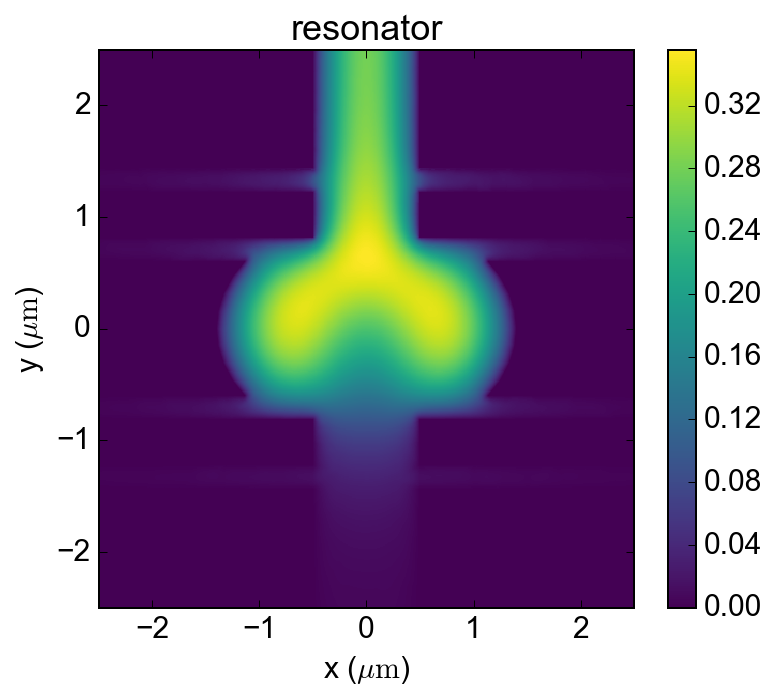

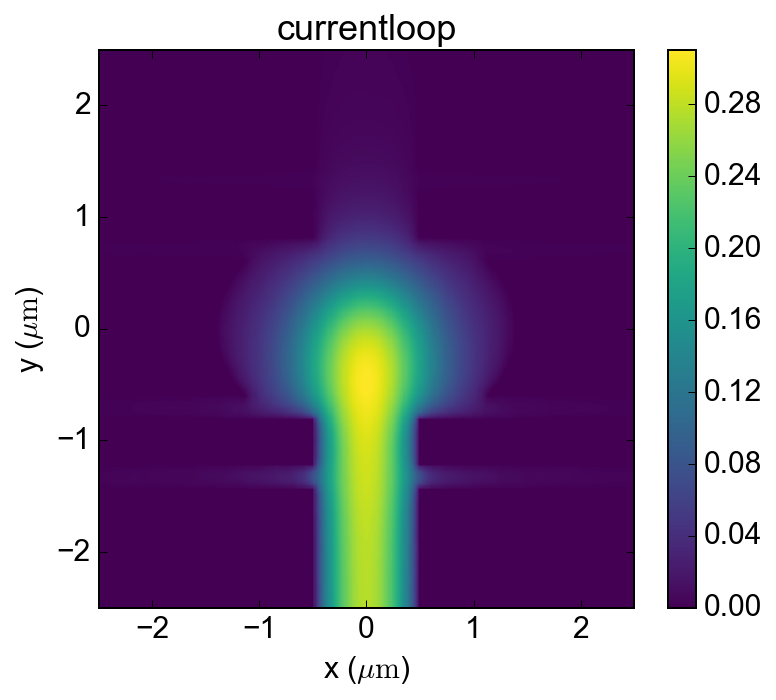

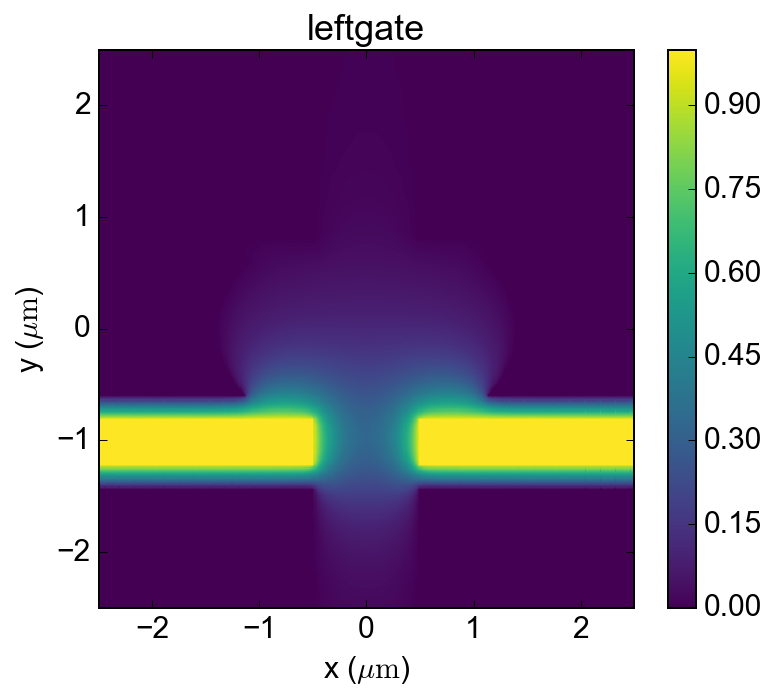

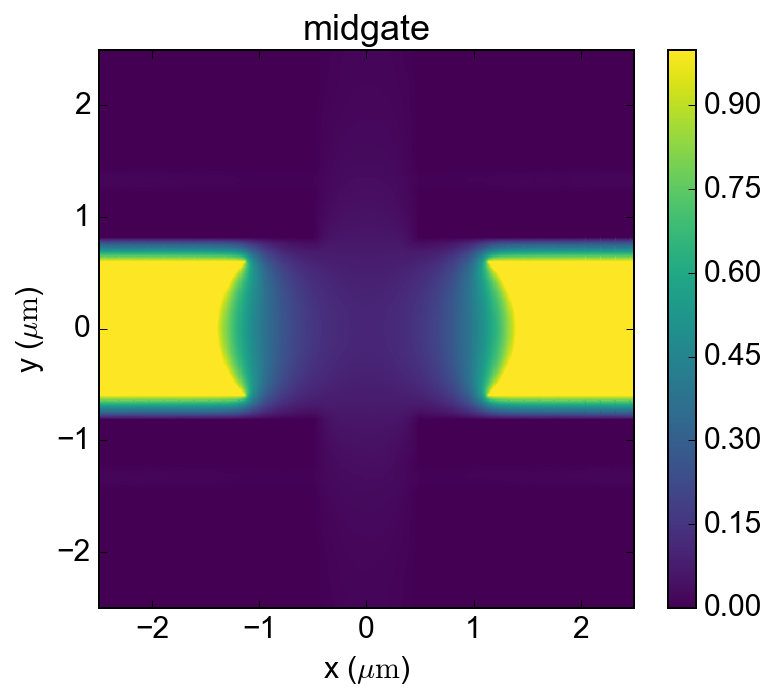

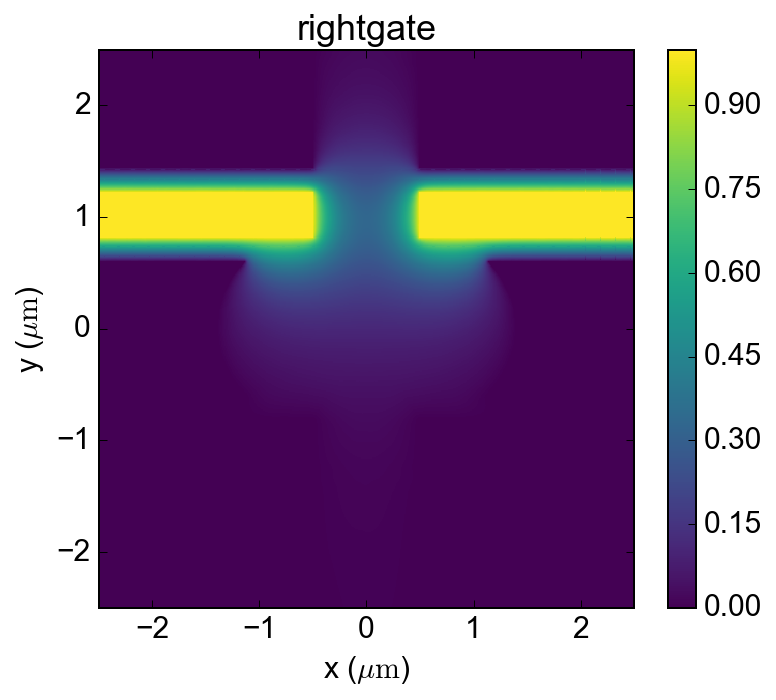

In [3]:
base_path = r'S:\Gerwin\Electron on helium\Maxwell\M016 Sweet Spot Exploration\0.1 pct accuracy'

fn_resonator = os.path.join(base_path, r'resonator_1V.fld')
fn_currentloop = os.path.join(base_path, r'currentloop_1V.fld')
fn_midgate = os.path.join(base_path, r'guard_center_1V.fld')
fn_rightgate = os.path.join(base_path, r'guard_right_1V.fld')
fn_leftgate = os.path.join(base_path, r'guard_left_1V.fld')

dicts = trap_analysis.load_potentials(fn_resonator, fn_currentloop, fn_leftgate, fn_midgate, fn_rightgate)
resonator, currentloop, leftgate, midgate, rightgate = dicts

In [4]:
potentials = [resonator, currentloop, rightgate, leftgate, midgate]
x, y, cropped_potentials = trap_analysis.crop_potentials(potentials, xdomain=(-2E-6, 2E-6), ydomain=(-1E-6, 1E-6))

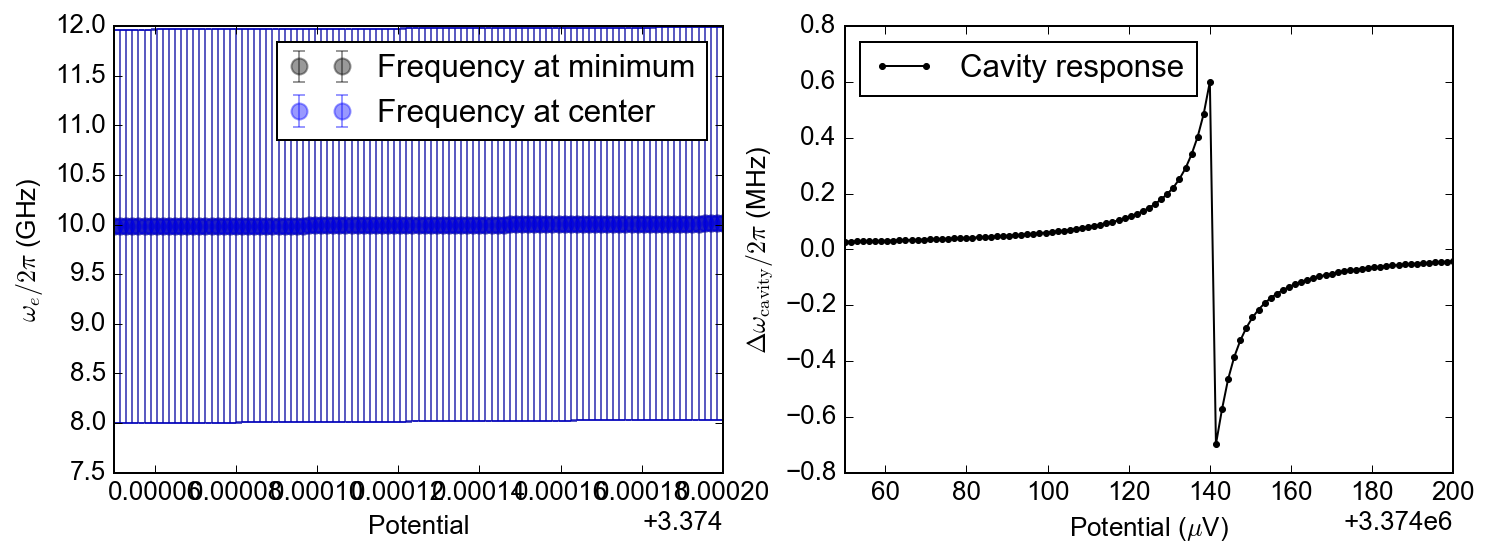

In [49]:
sweep_voltage = linspace(3.37405, 3.37420, 101)
coefficients = array([3.0, 0.50, -4.30, -3.0, 0])*2
cavity_props = {'P' : -80, 'f0' : 10E9, 'Q' : 1E4, 'beta' : 0.2433}
fmin, sigmamin, fctr, sigmactr = trap_analysis.sweep_electrode_voltage(x, y, cropped_potentials, coefficients, 
                                                                       sweep_voltage, sweep_electrode_idx=1, 
                                                                       fitdomain=(-0.5E-6, 0.5E-6), clim=(-1,1), 
                                                                       do_plot=False, print_report=False, 
                                                                       **cavity_props)

=====  =============  =============
  V     f_min (GHz)    f_ctr (GHz)
=====  =============  =============
3.374     40.441           nan
=====  =============  =============


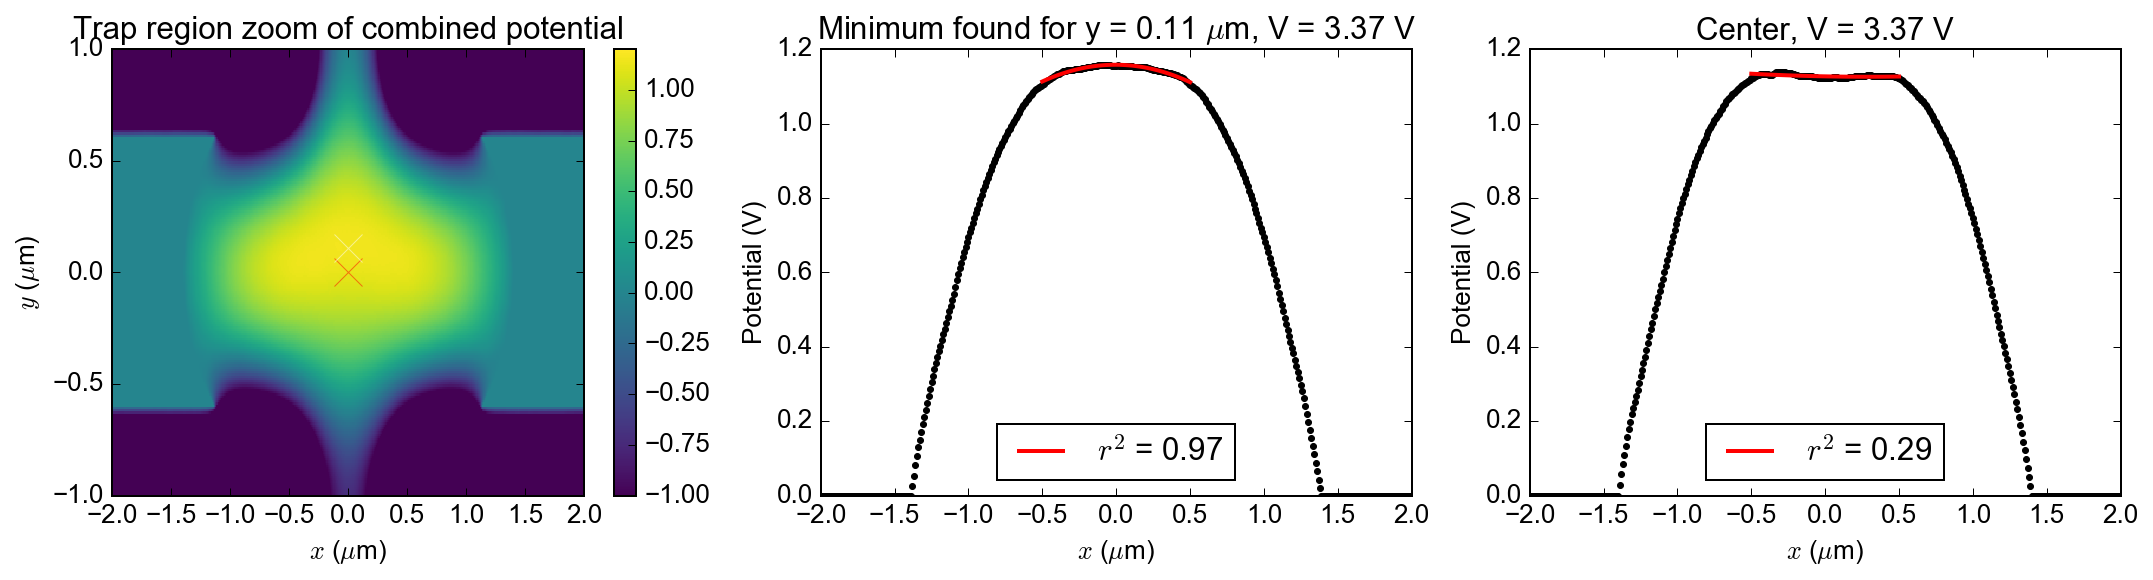

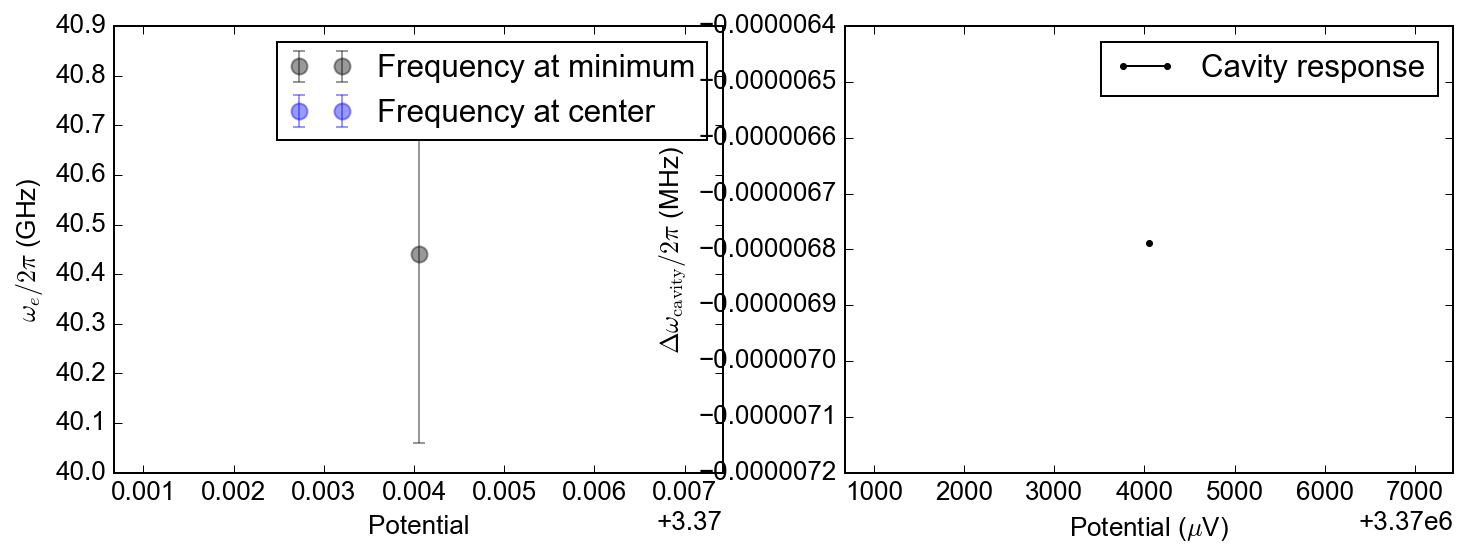

In [17]:
sweep_voltage = linspace(3.37405, 3.37420, 1)
coefficients = array([3.0, 0.50, -3.0, -3.0, 0])*2
cavity_props = {'P' : -80, 'f0' : 10E9, 'Q' : 1E4, 'beta' : 0.2433}
fmin, sigmamin, fctr, sigmactr = trap_analysis.sweep_electrode_voltage(x, y, cropped_potentials, coefficients, 
                                                                       sweep_voltage, sweep_electrode_idx=1, 
                                                                       fitdomain=(-0.5E-6, 0.5E-6), clim=(-1,1.2), 
                                                                       do_plot=True, print_report=True, 
                                                                       **cavity_props)